In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV for edge detection
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Function to preprocess and extract Laplacian edge features
def extract_laplacian_features(images):
    edge_features = []
    for image in images:
        # Convert to grayscale
        gray = rgb2gray(image)
        # Resize to 32x32 for consistency
        resized = resize(gray, (32, 32))
        # Apply Laplacian edge detection
        laplacian = cv2.Laplacian((resized * 255).astype(np.uint8), cv2.CV_64F)
        # Flatten the edge map into a feature vector
        edge_features.append(laplacian.flatten())
    return np.array(edge_features)



In [4]:
# Extract Laplacian edge features for training and testing images (subset for efficiency)
X_train_lap = extract_laplacian_features(X_train[:5000])
X_test_lap = extract_laplacian_features(X_test[:1000])

In [5]:
# Normalize features
scaler = StandardScaler()
X_train_lap = scaler.fit_transform(X_train_lap)
X_test_lap = scaler.transform(X_test_lap)

In [6]:
# Train a Logistic Regression classifier
clf = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial', random_state=42)
clf.fit(X_train_lap, y_train[:5000])  # Train on subset

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [7]:
# Predictions
y_pred = clf.predict(X_test_lap)

Accuracy: 0.154
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.13      0.13       103
           1       0.22      0.21      0.22        89
           2       0.15      0.17      0.16       100
           3       0.08      0.09      0.09       103
           4       0.12      0.12      0.12        90
           5       0.15      0.17      0.16        86
           6       0.14      0.12      0.12       112
           7       0.14      0.14      0.14       102
           8       0.23      0.24      0.23       106
           9       0.20      0.17      0.18       109

    accuracy                           0.15      1000
   macro avg       0.15      0.15      0.15      1000
weighted avg       0.15      0.15      0.15      1000



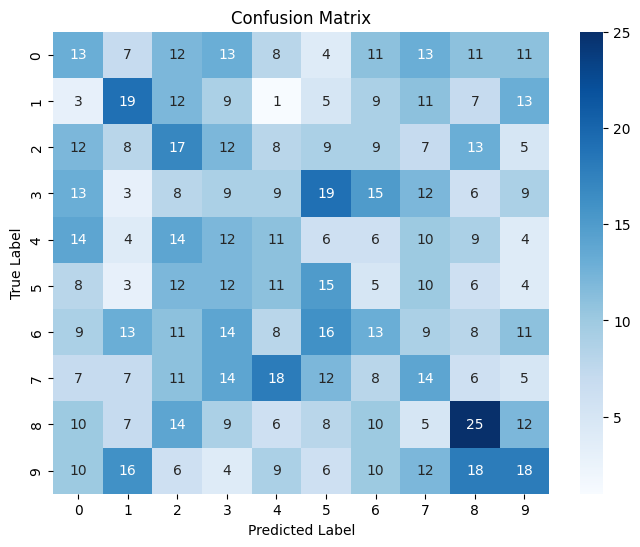

In [8]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test[:1000], y_pred))
print("Classification Report:\n", classification_report(y_test[:1000], y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test[:1000], y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
